In [1]:
from multiprocessing import Pool,Process,Manager,cpu_count
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image,ImageFilter
import warnings
import scipy.optimize as opt
import scipy as sp
import cmath
import time 
import math

%matplotlib inline
warnings.filterwarnings('ignore')

font = {'family' : 'Ubuntu',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)


In [2]:
def ListofFiles(path):
    filelist=[]
    for root, dirs, files in os.walk(path):
        for file in files:
             filelist.append(os.path.join(root,file))
    return filelist

def getImageValues(Files,EventLimit=1):
    if(type(Files) is list):
        values={}
        count=0
        for file in Files:
            img1=Image.open(file)
            imgArray=np.array(img1)
            values[count]=imgArray
            count+=1
            if(EventLimit==count):
                break
        print(f" {count} frames in dictinary ")
    else:
        img1=Image.open(Files)
        values=np.array(img1)
    return values

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data

def AvergImage(Images,rangex,Single=True,start=0):
    img=np.zeros(Images[0].shape)
    if (rangex>len(Images.keys())):
        rangex=len(Images.keys())
    # Average only one set
    if(Single):
        for i in range(start,rangex+start):
            img+=Images[i]
        img=img/rangex
        return img
    else: # Average Multiple Sets of Images
        cnt=0
        fImages=[]
        while(cnt<=len(Images.keys())-1):
            img+=Images[cnt]
            if (cnt%(rangex)==0 and cnt>0):
                fImages.append(img/rangex)
                img=np.zeros(Images[0].shape)
            cnt=cnt+1
        return fImages
    


In [3]:
#NewImageIntensifier=AvergImage(NewIIImages,rangex=1000,Single=True)

In [77]:
#OlderImageIntensifier=AvergImage(Images,rangex=1000,Single=True)
OlderImageIntensifier=PickleITRead("OlderII.p")
NewImageIntensifier=PickleITRead("NewII.p")

In [88]:
OlderCut=OlderImageIntensifier/np.mean(OlderImageIntensifier)
NewerCut=NewImageIntensifier/np.mean(NewImageIntensifier)

print(f" Old II Min is {np.mean(OlderCut)} and Max {np.max(OlderCut)}")
print(f" Old II Min is {np.mean(NewerCut)} and Max {np.max(NewerCut)}")


 Old II Min is 1.0000000000000002 and Max 1.1354365477674915
 Old II Min is 1.0 and Max 3.3175767023081577


Text(0.04, 0.5, 'Pixel Y')

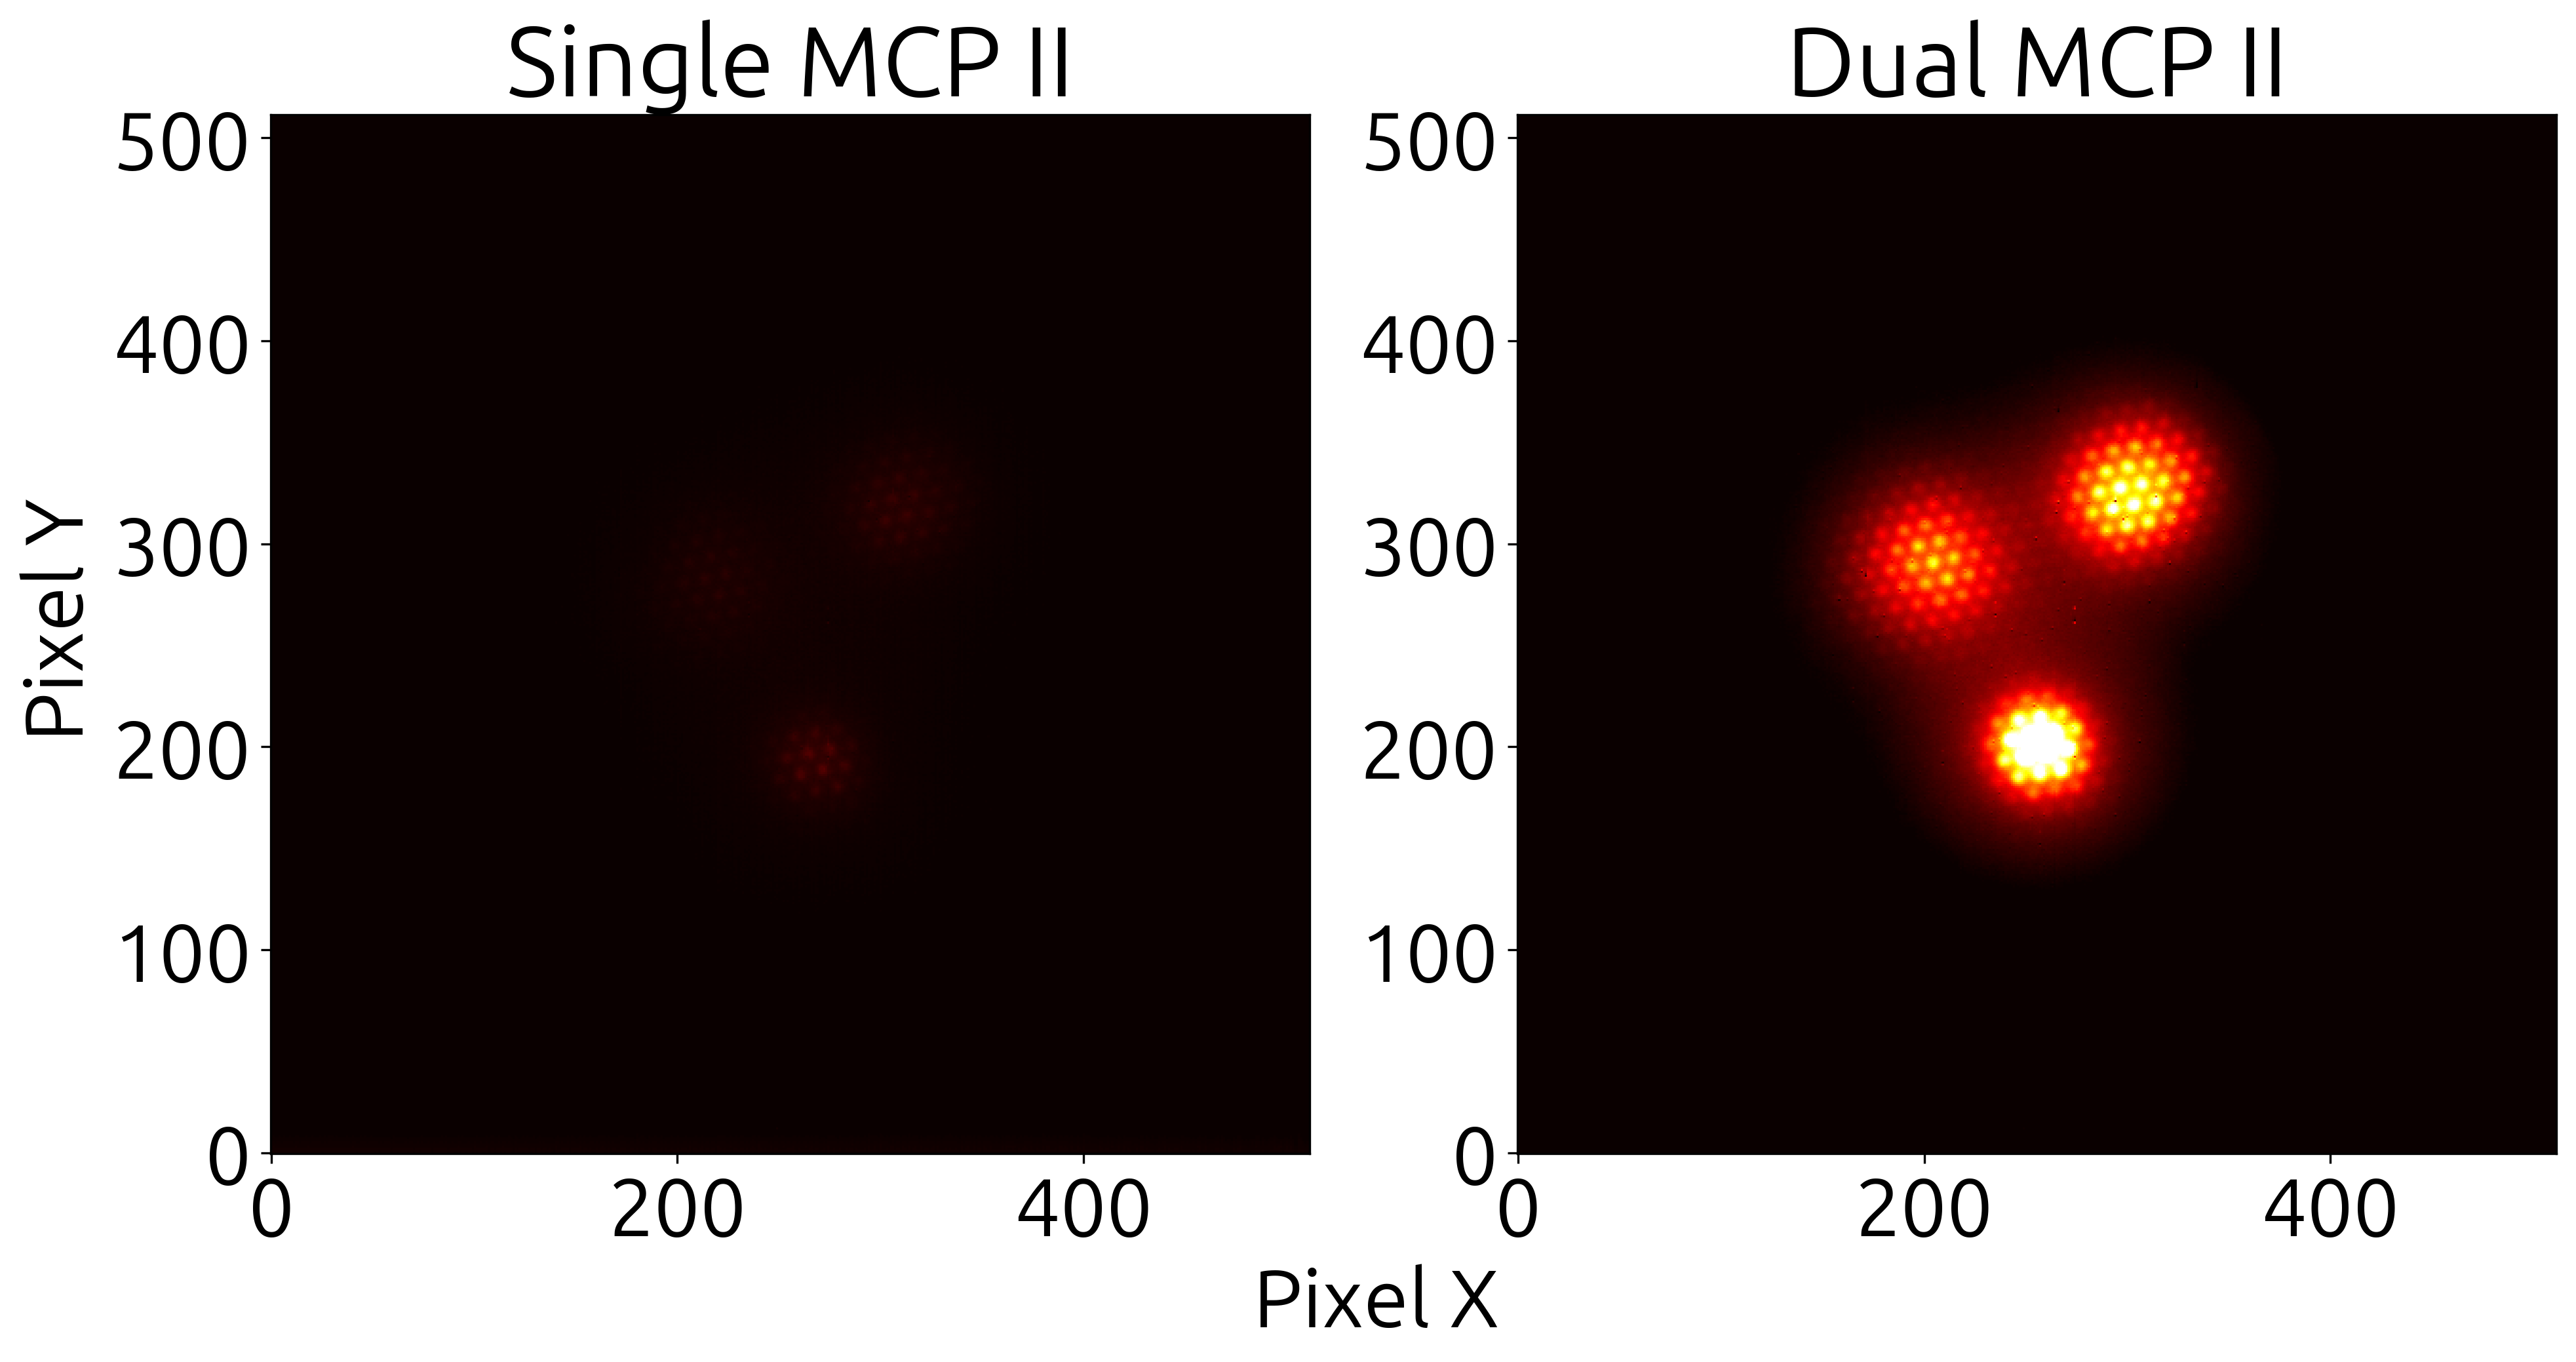

In [110]:
import matplotlib as mpl
fig,ax=plt.subplots(1,2,figsize=(15,15),dpi=300)
cmap = mpl.cm.hot
norm = mpl.colors.Normalize(vmin=np.mean(NewerCut),vmax=np.max(NewerCut))

#fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, orientation='horizontal')
ax[0].set_title("Single MCP II")
ax[0].imshow(OlderCut,cmap=cmap,origin="lower",interpolation='none',vmin=np.mean(NewerCut),vmax=np.max(NewerCut)*0.5)
ax[1].set_title("Dual MCP II")
ax[1].imshow(NewerCut,cmap=cmap,origin="lower",interpolation='none',vmin=np.mean(NewerCut),vmax=np.max(NewerCut)*0.5)
fig.text(0.5, 0.26, 'Pixel X', ha='center')
fig.text(0.04, 0.5, 'Pixel Y', va='center', rotation='vertical')

 Old II Min is -40.49576531600951 and Max 279.98523468399026
 Old II Min is -147.358007976532 and Max 5055.489992023468


Text(0.04, 0.5, 'Pixel Y')

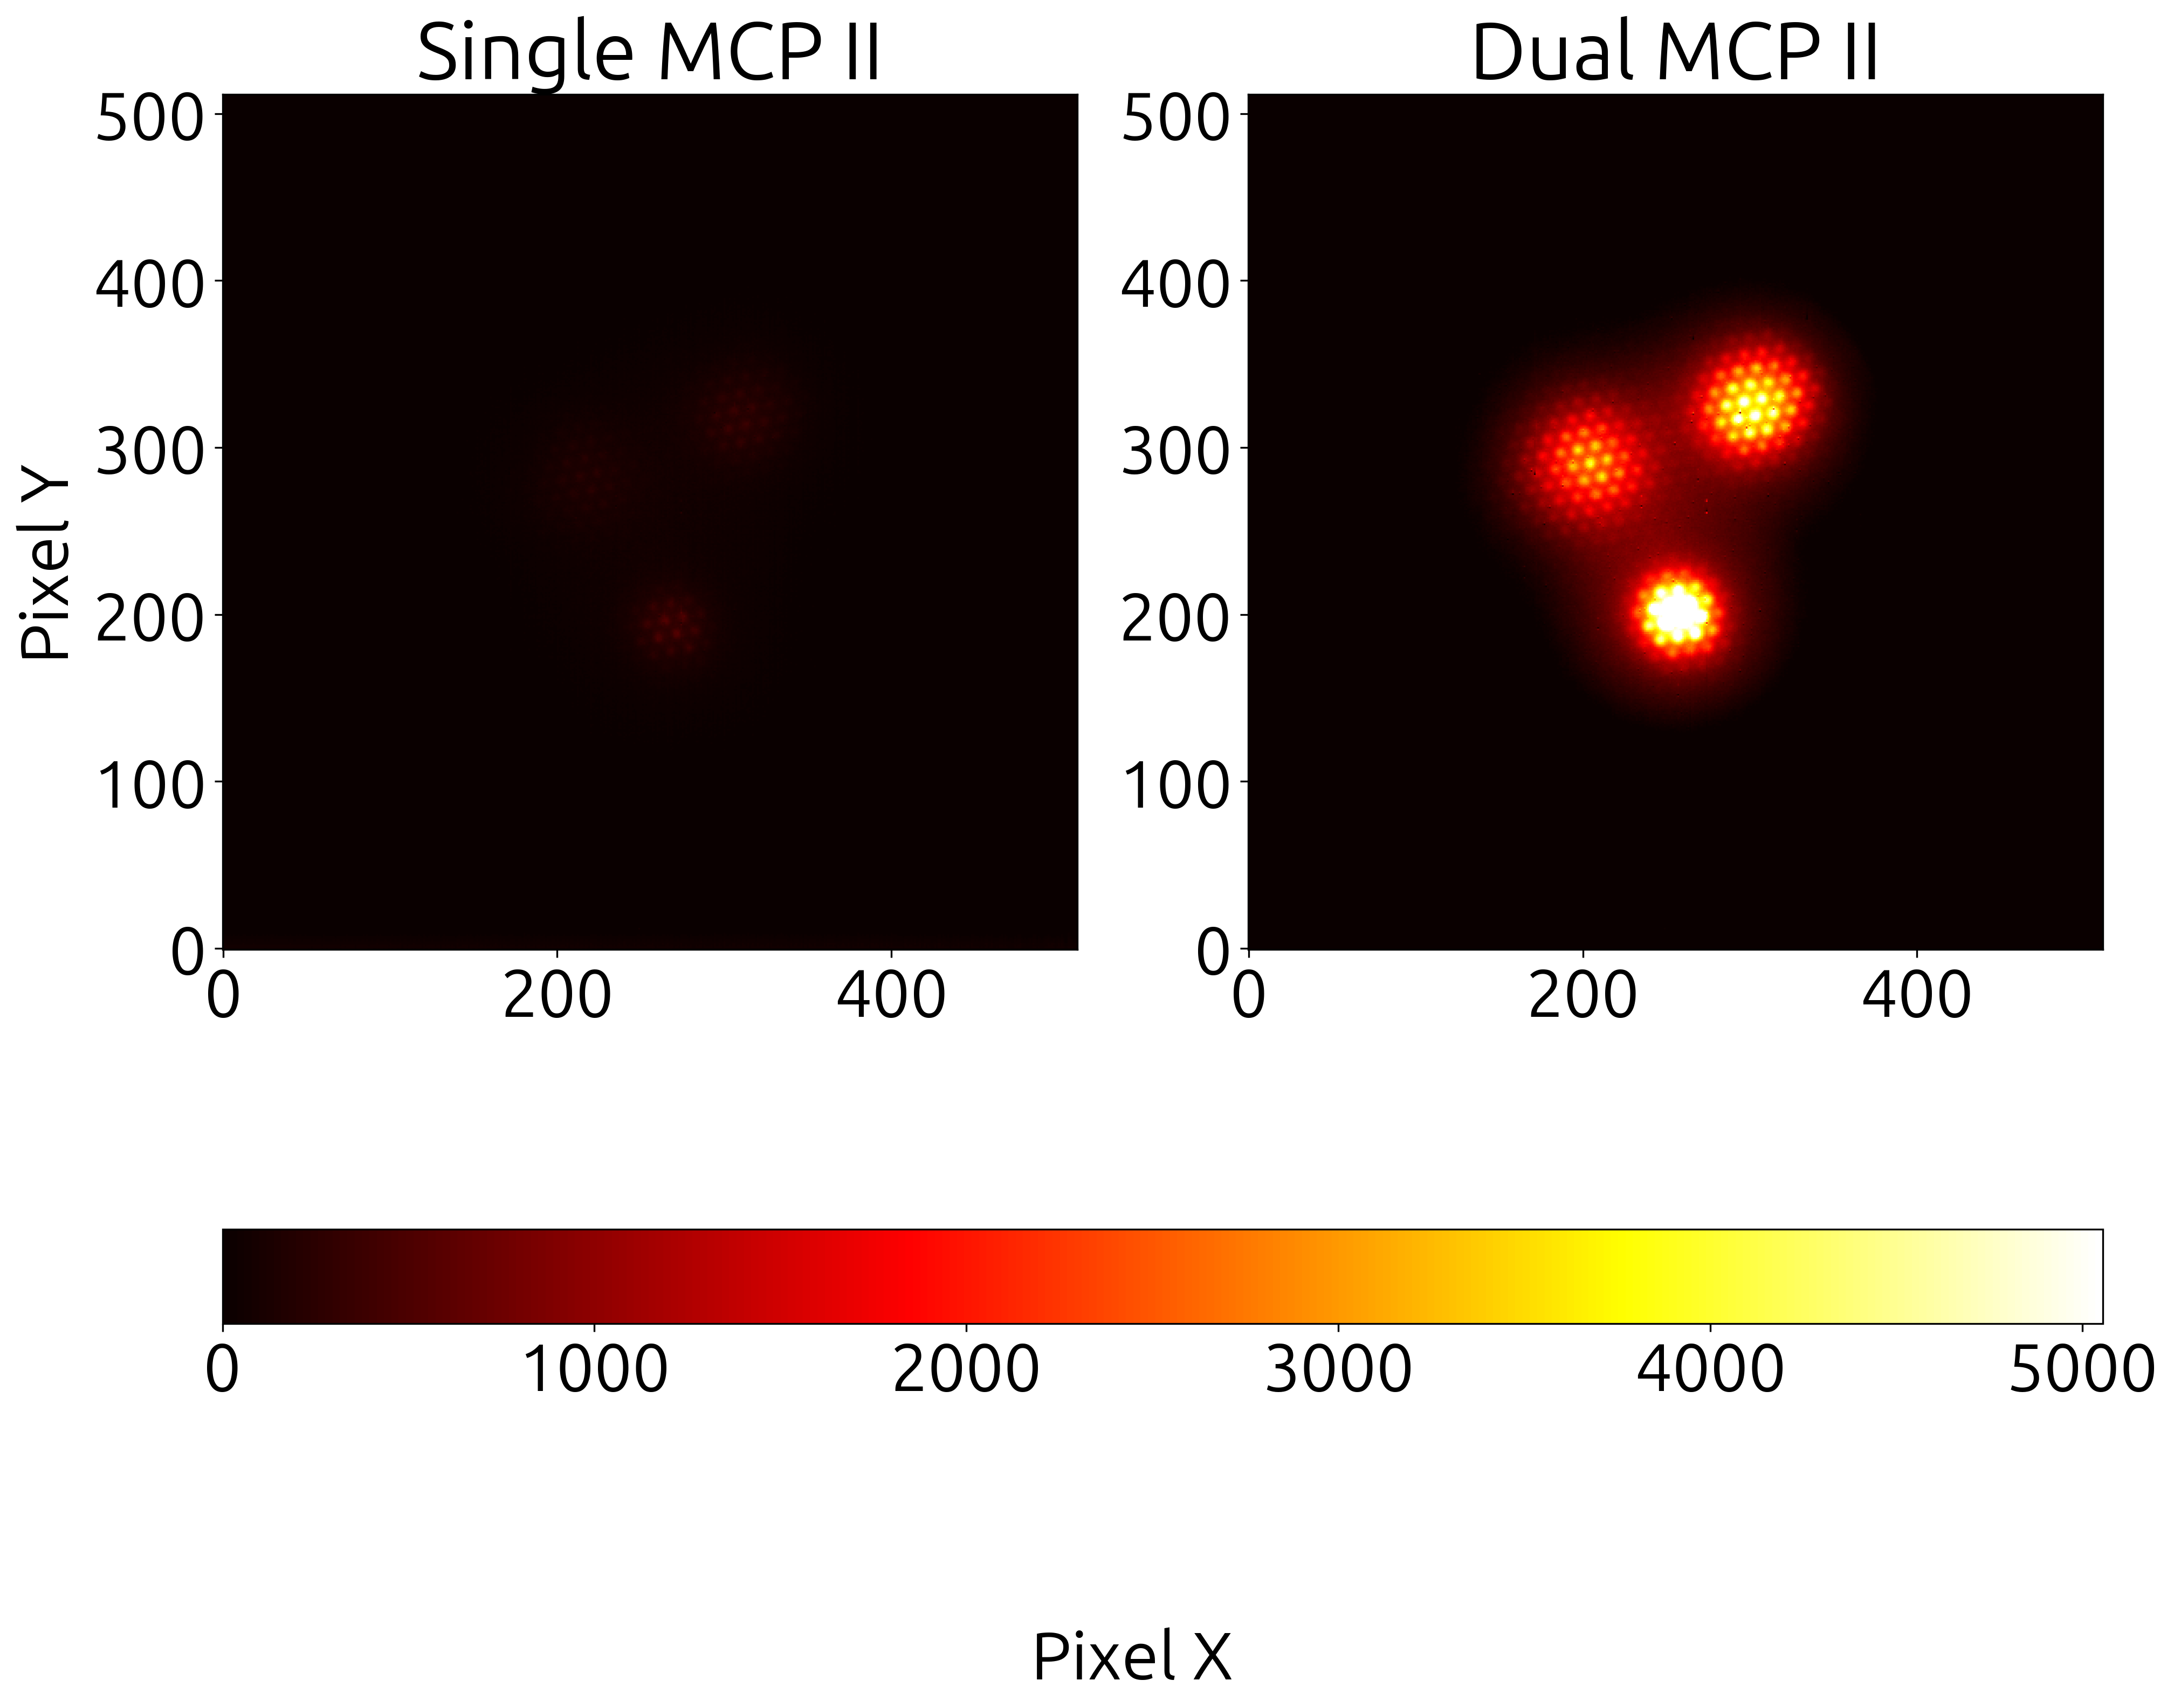

In [95]:
import matplotlib as mpl

OlderCut=OlderImageIntensifier-np.mean(OlderImageIntensifier)
NewerCut=NewImageIntensifier-np.mean(NewImageIntensifier)

print(f" Old II Min is {np.min(OlderCut)} and Max {np.max(OlderCut)}")
print(f" Old II Min is {np.min(NewerCut)} and Max {np.max(NewerCut)}")

fig,ax=plt.subplots(1,2,figsize=(15,15),dpi=300)
cmap = mpl.cm.hot
norm = mpl.colors.Normalize(vmin=np.mean(NewerCut),vmax=np.max(NewerCut))

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, orientation='horizontal')
ax[0].set_title("Single MCP II")
ax[0].imshow(OlderCut,cmap=cmap,origin="lower",interpolation='none',vmin=np.mean(NewerCut),vmax=np.max(NewerCut)*0.5)
ax[1].set_title("Dual MCP II")
ax[1].imshow(NewerCut,cmap=cmap,origin="lower",interpolation='none',vmin=np.mean(NewerCut),vmax=np.max(NewerCut)*0.5)
fig.text(0.5, 0.04, 'Pixel X', ha='center')
fig.text(0.04, 0.5, 'Pixel Y', va='center', rotation='vertical')